## Семинар 2. A/B тестирование. 

### План семинара

1. Постановка задачи A/B тестирования.
2. Метрики A/B тестирования.
3. Математическая постановка задачи A/B тестирования.
4. Пример A/B тестирования для конверсии на веб-страницах.
5. A/B тестирование для неизвестных распределений.

A/B тестирование

Наши предположения и гипотезы строятся на основе личного опыта и наших взглядов, которые совсем не обязательно совпадают со взглядами аудитории нашего ресурса. Другими словами, наше предположение вовсе не означает, что после внесения изменений мы получим желаемый эффект. Для проверки таких гипотез мы и проводим A/B тесты.


Идея A/B тестирования очень проста. Пользователи ресурса случайным образом делятся на сегменты. Один из сегментов остается без изменений — это контрольный сегмент “A”, на основе данных по этому сегменту мы будем оценивать эффект от вносимых изменений. Пользователям из сегмента “B” показываем измененную версию ресурса.

### Как обеспечить независимость выборки?

Важно отделить внешние и внутренние факторы для получения точной оценки:
1. Внешние факторы (важно проводить тестирование в один и тот же интервал времени
    * Промо акции
    * Сезонность
2. Внутренние факторы (факторы, исходящие со стороны компании):
    * Действия техподдержки
    * Администраторы ресурсов
    * Действия разработчиков

### Метрики для тестирования и подходящие распределения

#### Конверсия

Доля посетителей, совершивших заранее определенное действие (нажатие на кнопку, покупка предложения, подписка)

Количество посетителей можно представить как величину из биномиального распределения с параметрами $n$ - количество пользователей и $p$ - вероятность конверсии (или как сумму $n$ независимых бросаний монетки).

#### Экономические метрики

Характерные примеры:
* величина среднего чека
* объем выручки, отнесенный на число посетителей 

Выборку можно представить как выборку из нормального распределения, логнормального распределения. Дополнительно важно смотреть на выбросы и хвосты распределений!

#### Дискретные метрики

К дискретным метрикам можно отнести
* глубина просмотра страницы на сайте
* количество транзакций, произведенных пользователем за год

Такие величины обычно описываются распределением Пуассона:

$$
P(X = k) = \frac{\lambda^k \cdot e^{-\lambda}}{k!}.
$$

### Формальная постановка задачи A/B тестирования

Пусть $X$ и $Y$ - две независимые выборки, для которых есть метрики $\mu_x$ и $\mu_y$, определяющие среднее значение распределения.

Тогда рассматривается следующая гипотеза:
$$
H_0: \mu_x = \mu_y
$$
против альтернативы:

$$
H_1: \mu_x \ne \mu_y.
$$

Таким образом, если гипотеза $H_0$ отвергается, то считается, что A/B тест дал значимый результат (показатель действительно изменился).

Есть альтернативный способ задать тест:
$$
H_0: \mu_x \le \mu_y
$$

против альтернативы:

$$
H_1: \mu_x > \mu_y
$$

Таким образом можно проверить, действительно ли измеряемый показатель стал лучше.

### Пример работы A/B теста

Рассмотрим данные Google Analytics для сайта crazyegg (https://scholarworks.montana.edu/xmlui/handle/1/3507)


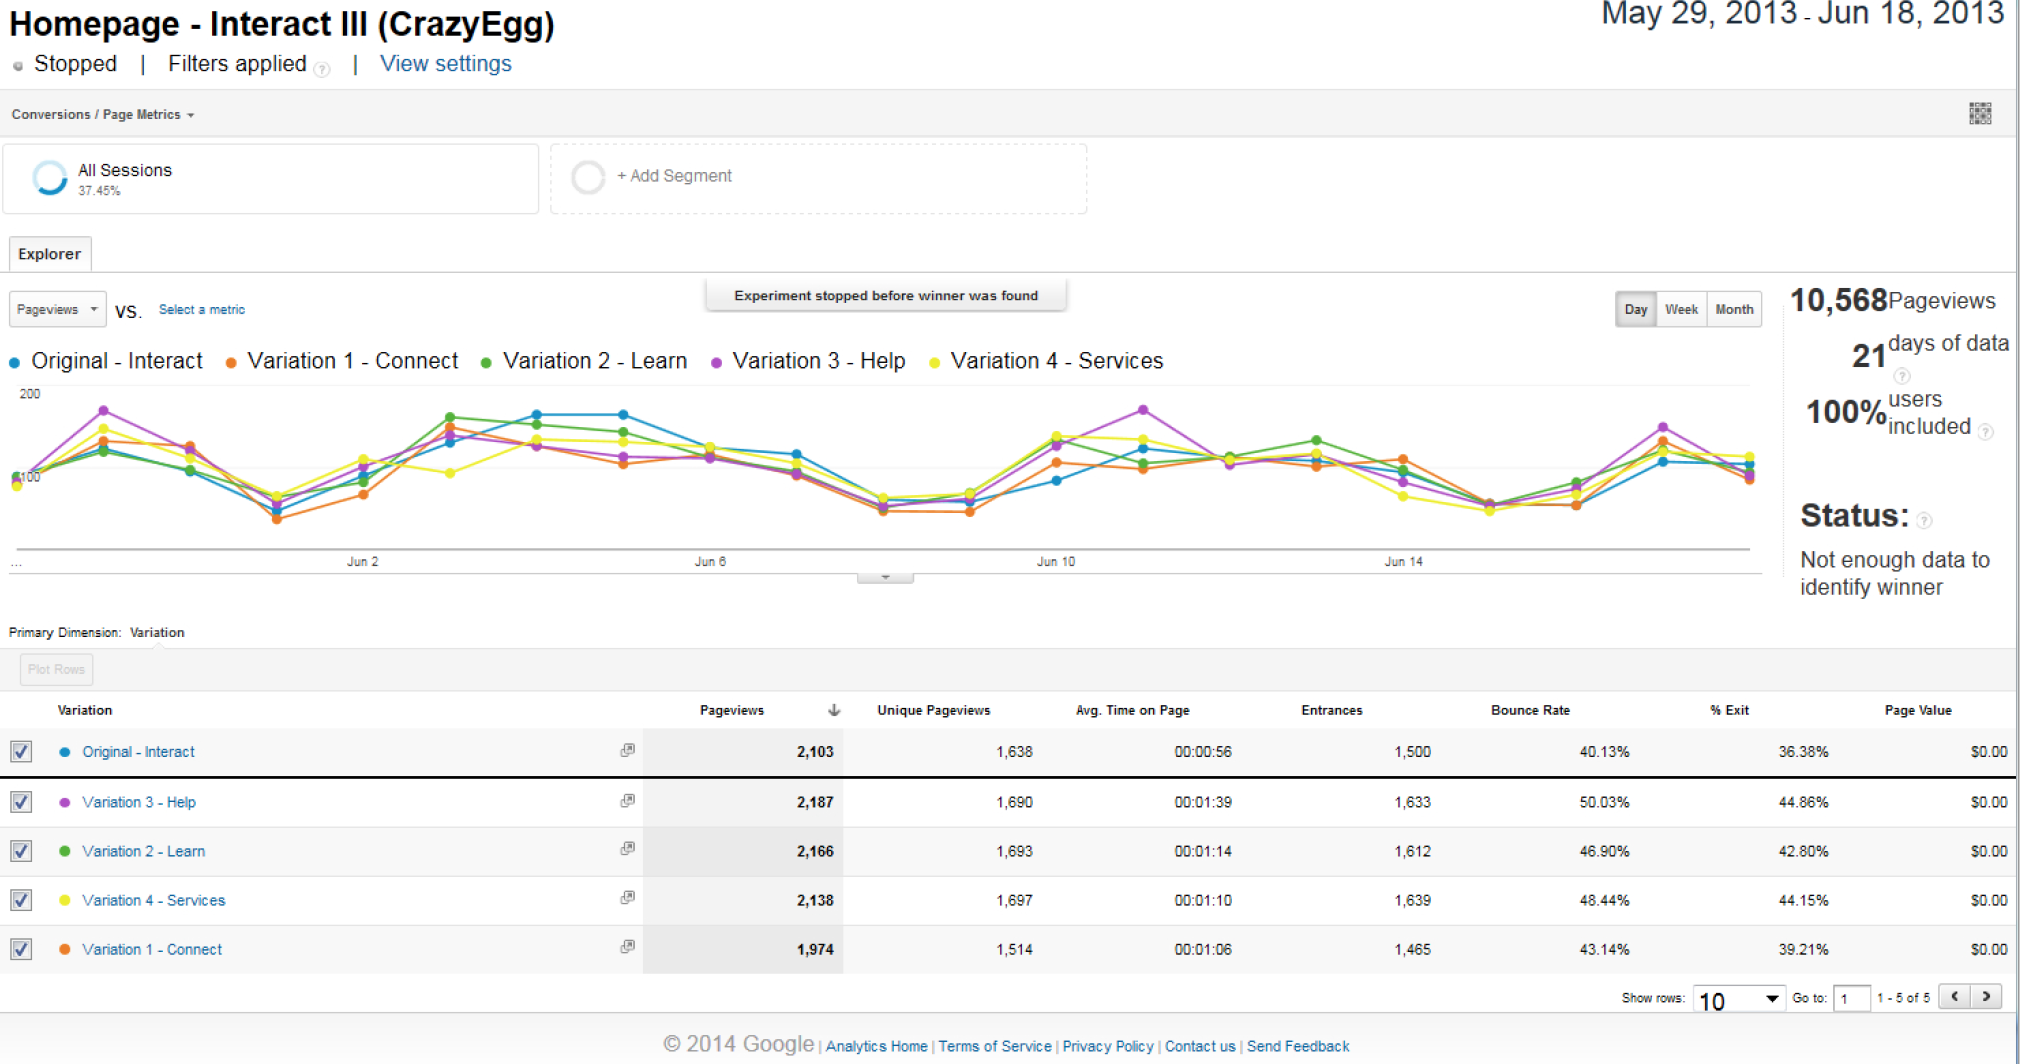

<b>Замечание!</b> С высокой степенью точности (из сходимости в ЦПТ), биноминальное распределение при больших значениях $n \cdot p$ и $n \cdot (1 - p)$ можно представить как нормальное распредлеление со средним $np$ и дисперсией $np(1 - p)$
Покажем это на визуальном примере.

In [13]:
from scipy.stats import binom, norm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [14]:
X = binom.rvs(n=10000, p=0.9, size=100000)

/data/anaconda3/envs/ml/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


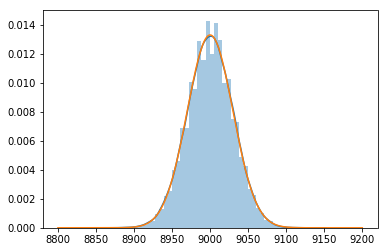

In [15]:
GRID = np.linspace(8800, 9200, 1000)
sns.distplot(X, bins=50, norm_hist=True)
plt.plot(GRID, norm(loc=10000 * 0.9, scale=np.sqrt(10000 * 0.9 * 0.1)).pdf(GRID))



Статистика критерия Стьюдента при в предположении независимости выборок:
    
$$
T(X, Y) = \frac{\bar{X} - \bar{Y}}{\sqrt{\frac{s_1^2}{n} + \frac{s_2^2}{m}}}
$$

В том случае, если $$\sum {X_i} \approx\sim \mathcal{N}(n\mu_x, n \mu_x \cdot (1 - \mu_x)),$$

то $$s_1^2 = \mu_x \cdot (1 - \mu_x),$$ $$s_2^2 = \mu_y \cdot (1 - \mu_y).$$

Поскольку в этом случае среднее значение выборки - это наблюдаемый процент конверсии, то получаем, что необходимо оценить следующую величину:

$$
T(X, Y) = \frac{\mu_x - \mu_y}{\sqrt{\frac{\mu_x \cdot (1 - \mu_x)}{n} + \frac{\mu_y \cdot (1 - \mu_y)}{m}}}
$$

Если $n$ и $m$ - большие, то тогда предельное распределение будет стандартным нормальным распределением.

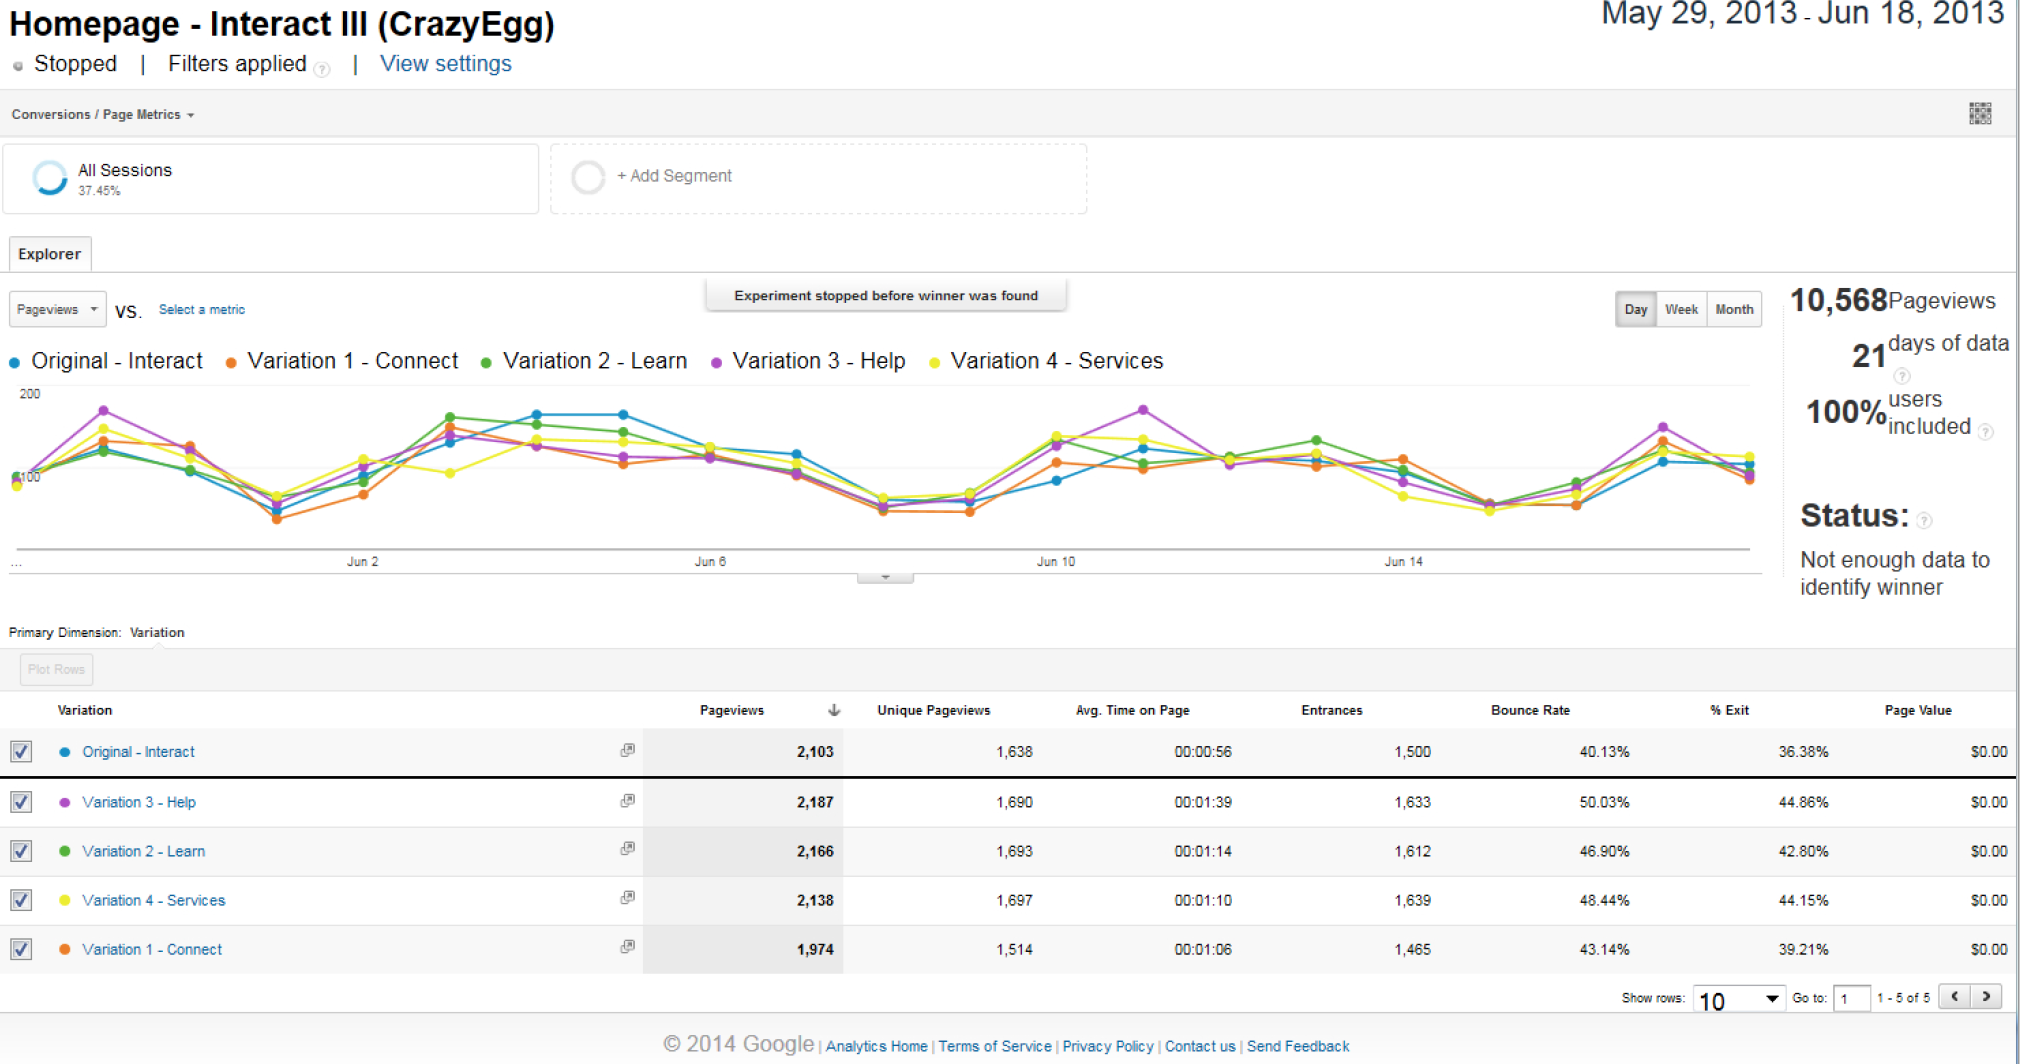

Проверим предположение, что bounce rate увеличился от перехода к Variation 1.

### Входные данные

In [16]:
mu_x = 0.4013
mu_y = 0.4314
n = 2103
m = 1974

Считаем статистику t

In [17]:
def t_stat_binomial(n, m, mu_x, mu_y):
    return (mu_x - mu_y) / np.sqrt(mu_x * (1 - mu_x) / n + mu_y * (1 - mu_y) / m)

In [18]:
t_stat_binomial(n, m, mu_x, mu_y)

-1.949014509970464

 Сформулируем гипотезу:
 
 $$ H_0: \mu_x \ge \mu_y,$$
 $$ H_1: \mu_x < \mu_y $$ 

При этом действует такое правило для уровня значимости $\alpha$: если $T(X, Y) < z_{\alpha}$, то отвергаем гипотезу $H_0$, иначе отвергнуть ее нельзя. 

In [19]:
norm.ppf(0.05)

-1.6448536269514729

В данном случае

In [20]:
t_stat_binomial(n, m, mu_x, mu_y) < norm.ppf(0.05)

True

Какие выводы можно сделать?

<b>Мнемоническое правило</b>

Если исходная гипотеза в $\le$, то попадание в левый хвост отвергает гипотезу.

Если исходная гипотеза в $\ge$, то попадание в правый хвост отвергает гипотезу.

Если исходная гипоеза в $=$, то попадание вне $[z_{\alpha / 2}, z_{1 - \alpha / 2}]$ отвергает гипотезу.

<b>Замечание!</b> Мы высказали много предположений: $n$, $m$ большие, $n \cdot \mu_x$, $m \cdot \mu_y$ большие, предельное распределение не нормальное, а распределение Стьюдента с большим количеством степеней свободы, поэтому можно применить следующий трюк: сгенерировать выборку и воспользоваться Python

In [21]:
X = np.ones(n)
Y = np.ones(m)
X[int(n * mu_x): ] = 0
Y[int(n * mu_y): ] = 0

In [22]:
from scipy.stats import ttest_ind

In [23]:
ttest_ind(X, Y, equal_var=False)

Ttest_indResult(statistic=-3.7826527538047285, pvalue=0.00015740627247240287)

Какие выводы можно сделать?

### A/B тестирование для неизвестных распределений

Если мы не знаем, из какого распределения у нас выборка, то можно применить U-критерий Манна-Уитни.

In [24]:
from scipy.stats import expon, mannwhitneyu

Z = expon(loc=1, scale=2).rvs(size=1000)
ZZ = expon(loc=1.5, scale=1).rvs(size=1000)

mannwhitneyu(Z, ZZ)

MannwhitneyuResult(statistic=486957.0, pvalue=0.15624399582255388)

## Что умеем?

* Определять задачу A/B тестирования в виде задачи математической статистики
* Работать с приближением биномиального распределения нормальным
* Эмулировать биномиальное распределение выборкой из бросаний монетки.

## Полезные ссылки

1. https://en.wikipedia.org/wiki/A/B_testing - есть примеры критериев, которые можно применять к различным распределениям.
2. http://www.machinelearning.ru/wiki/index.php?title=Критерий_Уилкоксона-Манна-Уитни